In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create the dataset with Mechanical, Environmental, and Electrical Losses
motor_power_hp = np.arange(0.5, 50.5, 0.5)  # Motor power range from 0.5 to 50 HP in steps of 0.5
working_hours_per_day = np.arange(1, 16)    # Working hours per day range from 1 to 15

np.random.seed(42)  # Set seed for reproducibility
data = []

for hp in motor_power_hp:
    for hours in working_hours_per_day:
        power_fluctuation = np.random.uniform(0, 20)  # Power fluctuation 0% to 20%
        mechanical_loss = np.random.uniform(0, 2)     # Mechanical loss 0% to 2%
        environmental_loss = np.random.uniform(0, 0.5)  # Environmental loss 0% to 0.5%
        electrical_loss = 5  # Electrical loss fixed at 5%

        # Calculate lifespan reduction factors
        total_loss = electrical_loss + mechanical_loss + environmental_loss  # Total loss in percentage
        reduction_factor = 1 - (total_loss / 100)  # Convert percentage loss to a reduction factor

        # Lifespan calculation includes all types of losses
        lifespan = max(1000, 50000 * reduction_factor - (hp * 1000 + hours * 200 + power_fluctuation * 100 + np.random.normal(0, 1000)))
        data.append([hp, hours, power_fluctuation, mechanical_loss, environmental_loss, electrical_loss, lifespan])

# Convert to DataFrame
df = pd.DataFrame(data, columns=[
    "Motor_Power_HP", "Working_Hours_Per_Day", "Power_Fluctuation", 
    "Mechanical_Loss", "Environmental_Loss", "Electrical_Loss", "Lifespan_Hours"
])

# Save to CSV
df.to_csv('motor_lifespan_data_with_losses.csv', index=False)
print("Dataset created and saved as 'motor_lifespan_data_with_losses.csv'.")

Dataset created and saved as 'motor_lifespan_data_with_losses.csv'.


In [3]:
# Step 2: Load the dataset and perform data preprocessing
df = pd.read_csv(r"C:\Users\Abhishek\Desktop\project done\saptarshi\updated\motor_lifespan_data_with_losses.csv")

# Step 3: Exploratory Data Analysis (EDA)
print(df.describe())


       Motor_Power_HP  Working_Hours_Per_Day  Power_Fluctuation  \
count     1500.000000            1500.000000        1500.000000   
mean        25.250000               8.000000          10.077916   
std         14.437848               4.321935           5.775862   
min          0.500000               1.000000           0.000233   
25%         12.875000               4.000000           5.045706   
50%         25.250000               8.000000          10.252385   
75%         37.625000              12.000000          14.972612   
max         50.000000              15.000000          19.977852   

       Mechanical_Loss  Environmental_Loss  Electrical_Loss  Lifespan_Hours  
count      1500.000000         1500.000000           1500.0     1500.000000  
mean          0.994769            0.249311              5.0    19547.606265  
std           0.576865            0.144843              0.0    13736.264199  
min           0.000061            0.000327              5.0     1000.000000  
25%   

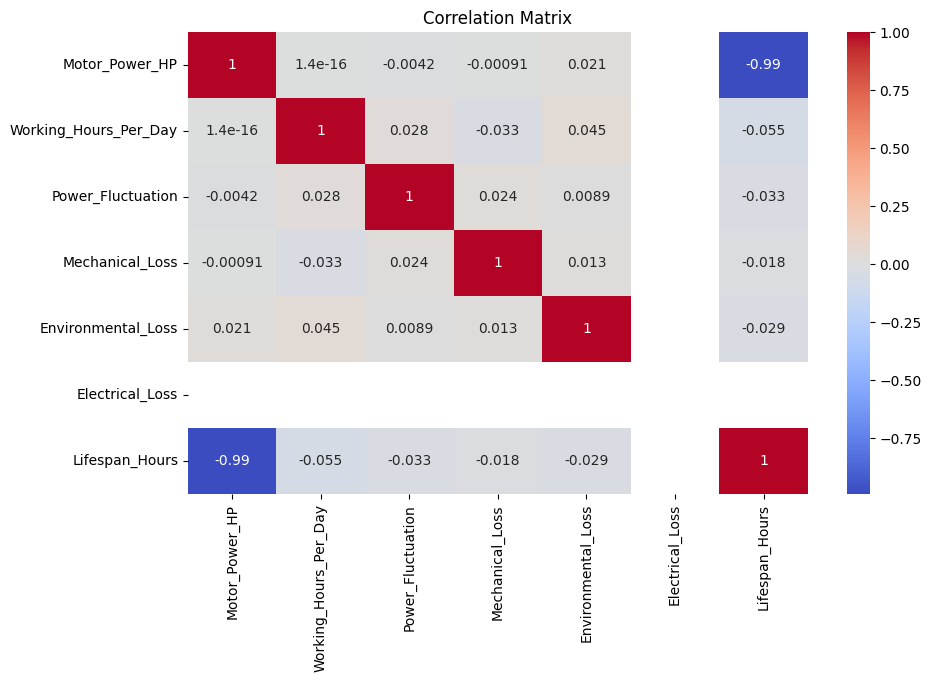

In [4]:
# Visualize correlations between variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

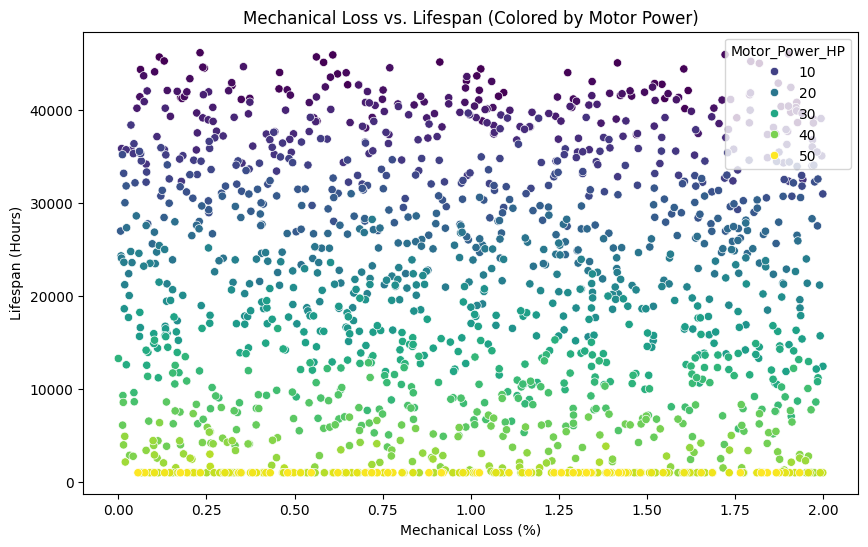

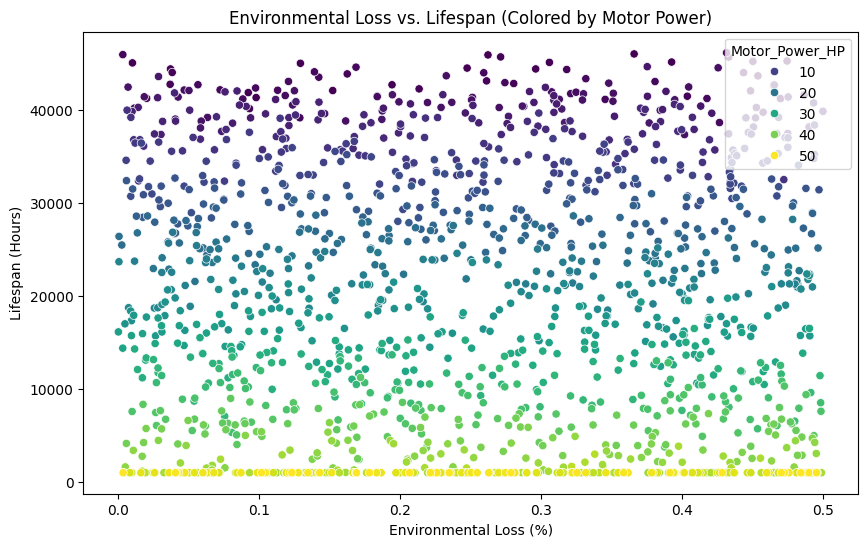

In [5]:
# Scatter plot with mechanical and environmental losses
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mechanical_Loss', y='Lifespan_Hours', hue='Motor_Power_HP', data=df, palette='viridis')
plt.title('Mechanical Loss vs. Lifespan (Colored by Motor Power)')
plt.xlabel('Mechanical Loss (%)')
plt.ylabel('Lifespan (Hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Environmental_Loss', y='Lifespan_Hours', hue='Motor_Power_HP', data=df, palette='viridis')
plt.title('Environmental Loss vs. Lifespan (Colored by Motor Power)')
plt.xlabel('Environmental Loss (%)')
plt.ylabel('Lifespan (Hours)')
plt.show()

In [6]:
# Step 4: Prepare the data for training
X = df[['Motor_Power_HP', 'Working_Hours_Per_Day', 'Power_Fluctuation', 'Mechanical_Loss', 'Environmental_Loss', 'Electrical_Loss']]
y = df['Lifespan_Hours']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 5: Train multiple machine learning models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R^2': r2}
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}")

Linear Regression - Mean Squared Error: 1991066.51, R^2 Score: 0.99
Random Forest Regressor - Mean Squared Error: 967516.38, R^2 Score: 0.99
Decision Tree Regressor - Mean Squared Error: 2203170.61, R^2 Score: 0.99
Gradient Boosting Regressor - Mean Squared Error: 903952.46, R^2 Score: 1.00
Support Vector Regressor - Mean Squared Error: 181621119.47, R^2 Score: 0.04
K-Nearest Neighbors Regressor - Mean Squared Error: 1276719.77, R^2 Score: 0.99


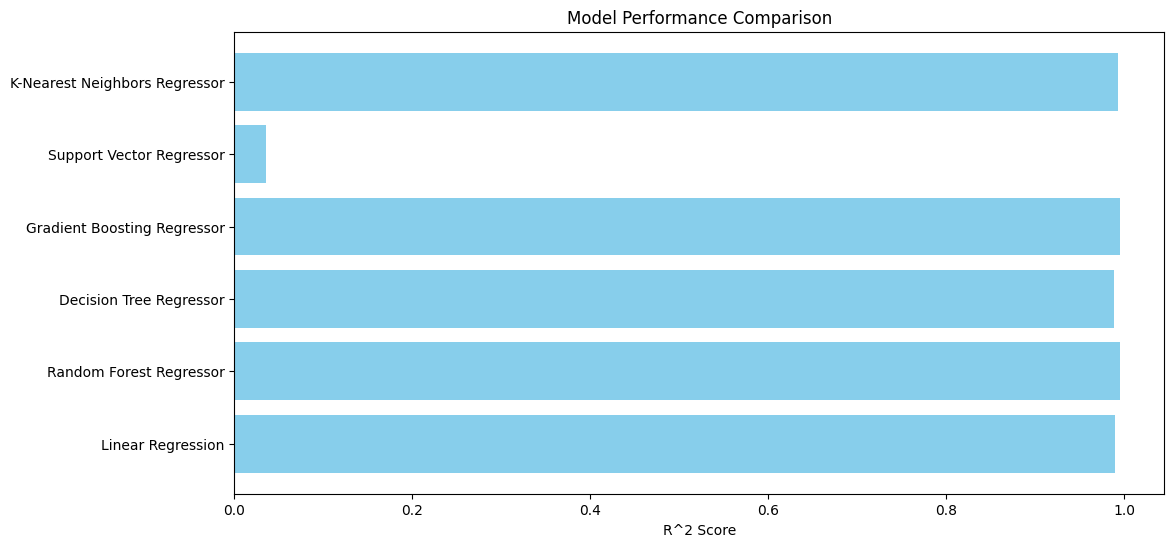

In [8]:
# Step 6: Visualize the results of the models
plt.figure(figsize=(12, 6))
plt.barh(list(results.keys()), [results[model]['R^2'] for model in results], color='skyblue')
plt.xlabel('R^2 Score')
plt.title('Model Performance Comparison')
plt.show()

In [9]:
# Step 7: Testing Code (using the best model based on training R^2 score)
def predict_pump_lifespan(model, pump_power_hp, working_hours_daily, power_fluctuation, mechanical_loss, environmental_loss):
    input_df = pd.DataFrame({
        'Motor_Power_HP': [pump_power_hp],
        'Working_Hours_Per_Day': [working_hours_daily],
        'Power_Fluctuation': [power_fluctuation],
        'Mechanical_Loss': [mechanical_loss],
        'Environmental_Loss': [environmental_loss],
        'Electrical_Loss': [5]  # Electrical loss is fixed at 5%
    })
    predicted_lifespan = model.predict(input_df)
    return predicted_lifespan

# Get user input
pump_power_hp = float(input("Enter pump power in HP: "))
working_hours_daily = float(input("Enter working hours per day: "))
power_fluctuation = float(input("Enter power fluctuation (0-20%): "))
mechanical_loss = float(input("Enter mechanical loss (0-2%): "))
environmental_loss = float(input("Enter environmental loss (0-0.5%): "))

# Predict pump lifespan using each model and print the results
print("\nPredicted Lifespans based on user input:")
for model_name, model in models.items():
    predicted_lifespan = predict_pump_lifespan(model, pump_power_hp, working_hours_daily, power_fluctuation, mechanical_loss, environmental_loss)
    print(f"{model_name} Prediction: {predicted_lifespan[0]:.2f} hours")

# Select the best model based on R^2 score and use it for the final prediction
best_model_name = max(results, key=lambda x: results[x]['R^2'])
best_model_pred = predict_pump_lifespan(models[best_model_name], pump_power_hp, working_hours_daily, power_fluctuation, mechanical_loss, environmental_loss)

print(f"\nThe best model based on training R^2 score is: {best_model_name}")
print(f"Based on the input values, the pump is expected to work perfectly for at least {best_model_pred[0]:.2f} hours.")
print(f"This is equivalent to approximately {best_model_pred[0] / (working_hours_daily * 365):.2f} years.")

Enter pump power in HP:  5
Enter working hours per day:  15
Enter power fluctuation (0-20%):  5
Enter mechanical loss (0-2%):  1
Enter environmental loss (0-0.5%):  5



Predicted Lifespans based on user input:
Linear Regression Prediction: 35823.72 hours
Random Forest Regressor Prediction: 38665.59 hours
Decision Tree Regressor Prediction: 38182.96 hours
Gradient Boosting Regressor Prediction: 38869.14 hours
Support Vector Regressor Prediction: 19454.72 hours
K-Nearest Neighbors Regressor Prediction: 37986.38 hours

The best model based on training R^2 score is: Gradient Boosting Regressor
Based on the input values, the pump is expected to work perfectly for at least 38869.14 hours.
This is equivalent to approximately 7.10 years.


saving the top 3 model for predictions

In [11]:
import joblib

# Sort models based on R² score
top_3_models = sorted(results.items(), key=lambda x: x[1]['R^2'], reverse=True)[:3]

# Save the top 3 models
for i, (model_name, _) in enumerate(top_3_models, 1):
    joblib.dump(models[model_name], f'top_{i}_model_{model_name}.pkl')
    print(f"Model '{model_name}' saved as 'top_{i}_model_{model_name}.pkl'.")


Model 'Gradient Boosting Regressor' saved as 'top_1_model_Gradient Boosting Regressor.pkl'.
Model 'Random Forest Regressor' saved as 'top_2_model_Random Forest Regressor.pkl'.
Model 'K-Nearest Neighbors Regressor' saved as 'top_3_model_K-Nearest Neighbors Regressor.pkl'.


run this code to calculate predictions

In [16]:
import joblib
import pandas as pd

# Load the top 3 models
model_paths = [r"C:\Users\Abhishek\Desktop\project done\saptarshi\updated\top_1_model_Gradient Boosting Regressor.pkl", 
               r"C:\Users\Abhishek\Desktop\project done\saptarshi\updated\top_2_model_Random Forest Regressor.pkl", 
               r"C:\Users\Abhishek\Desktop\project done\saptarshi\updated\top_3_model_K-Nearest Neighbors Regressor.pkl"]
models = [joblib.load(path) for path in model_paths]

def predict_pump_lifespan(model, pump_power_hp, working_hours_daily, power_fluctuation, mechanical_loss, environmental_loss):
    input_df = pd.DataFrame({
        'Motor_Power_HP': [pump_power_hp],
        'Working_Hours_Per_Day': [working_hours_daily],
        'Power_Fluctuation': [power_fluctuation],
        'Mechanical_Loss': [mechanical_loss],
        'Environmental_Loss': [environmental_loss],
        'Electrical_Loss': [5]  # Electrical loss is fixed at 5%
    })
    predicted_lifespan = model.predict(input_df)
    return predicted_lifespan



In [17]:
# Get user input
pump_power_hp = float(input("Enter pump power in HP: "))
working_hours_daily = float(input("Enter working hours per day: "))
power_fluctuation = float(input("Enter power fluctuation (0-20%): "))
mechanical_loss = float(input("Enter mechanical loss (0-2%): "))
environmental_loss = float(input("Enter environmental loss (0-0.5%): "))

# Predict pump lifespan using the top 3 models and print the results
predictions = []
for i, model in enumerate(models, 1):
    predicted_lifespan = predict_pump_lifespan(model, pump_power_hp, working_hours_daily, power_fluctuation, mechanical_loss, environmental_loss)
    predictions.append(predicted_lifespan[0])
    print(f"Top {i} model Prediction: {predicted_lifespan[0]:.2f} hours")

# Select the model with the highest predicted lifespan
best_prediction = max(predictions)
best_model_index = predictions.index(best_prediction) + 1

print(f"\nThe model with the highest predicted lifespan is the Top {best_model_index} model.")
print(f"Based on the input values, the pump is expected to work perfectly for at least {best_prediction:.2f} hours.")
print(f"This is equivalent to approximately {best_prediction / (working_hours_daily * 365):.2f} years.")


Enter pump power in HP:  5
Enter working hours per day:  5
Enter power fluctuation (0-20%):  5
Enter mechanical loss (0-2%):  5
Enter environmental loss (0-0.5%):  5


Top 1 model Prediction: 40229.17 hours
Top 2 model Prediction: 40985.60 hours
Top 3 model Prediction: 39757.53 hours

The model with the highest predicted lifespan is the Top 2 model.
Based on the input values, the pump is expected to work perfectly for at least 40985.60 hours.
This is equivalent to approximately 22.46 years.
